In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import os

japanize_matplotlib.japanize() 

In [2]:
raw_data = pd.read_csv('./data/maikin/all_cleaned.csv', encoding='utf_8_sig', low_memory=False)
raw_data.head()

,年,月,産業分類,規模,就業形態,現金給与総額,きまって支給する給与,所定内給与,所定外給与,特別給与,総実労働時間,所定内労働時間,所定外労働時間,出勤日数,前月末労働者数,増加労働者数,減少労働者数,本月末労働者数,パートタイム労働者数
0,1960,CY,C,0,0,26250,22547.0,NaN,NaN,3703.0,193.6,170.8,22.8,23.0,NaN,NaN,NaN,NaN,NaN
1,1960,CY,C,4,0,28786,24682.0,NaN,NaN,NaN,193.2,168.4,24.8,22.8,NaN,NaN,NaN,NaN,NaN
2,1960,CY,C,5,0,22422,19121.0,NaN,NaN,NaN,196.7,175.1,21.6,23.5,NaN,NaN,NaN,NaN,NaN
3,1960,CY,C,7,0,18826,16814.0,NaN,NaN,NaN,187.9,176.3,11.6,23.4,NaN,NaN,NaN,NaN,NaN
4,1960,CY,D,0,0,21213,17952.0,NaN,NaN,3261.0,211.0,186.4,24.6,24.1,NaN,NaN,NaN,NaN,NaN


## 前処理

In [3]:
# 1995年以降のデータを抽出
all_data = raw_data[raw_data["年"] >= 1995]

# 月 = CY（年平均）のデータのみを抽出
all_data = all_data[all_data["月"] == "CY"]
all_data = all_data.drop(columns=["月"])

# 規模 = "T"（5人以上）のデータのみを抽出
all_data = all_data[all_data["規模"] == "T"]
all_data = all_data.drop(columns=["規模"])

# 就業形態 = 1（一般労働者）のみを抽出
all_data = all_data[all_data["就業形態"] == 1]
all_data = all_data.drop(columns=["就業形態"])

all_data.head()

,年,産業分類,現金給与総額,きまって支給する給与,所定内給与,所定外給与,特別給与,総実労働時間,所定内労働時間,所定外労働時間,出勤日数,前月末労働者数,増加労働者数,減少労働者数,本月末労働者数,パートタイム労働者数
2662,1995,C,374611,301852.0,276967.0,24885.0,72759.0,180.6,167.4,13.2,21.9,64287.0,664.0,756.0,64123.0,NaN
2680,1995,D,388111,319960.0,303939.0,16021.0,68151.0,174.3,164.6,9.7,21.5,3923194.0,72226.0,74583.0,3921455.0,NaN
2704,1995,E,388186,299759.0,272771.0,26988.0,88427.0,170.0,156.9,13.1,20.3,9717162.0,94981.0,116329.0,9696646.0,NaN
2788,1995,F,575765,414974.0,371855.0,43119.0,160791.0,159.3,147.0,12.3,19.4,320788.0,3454.0,3472.0,320772.0,NaN
2832,1995,TL,408425,314595.0,293819.0,20776.0,93830.0,169.8,158.8,11.0,20.8,34724448.0,481044.0,521868.0,34684417.0,NaN


In [4]:
# 産業分類のカテゴリを確認
all_data["産業分類"].unique()

array(['C', 'D', 'E', 'F', 'TL', 'G', 'H', 'I', 'J', 'O', 'P', 'Q', 'K',
       'L', 'M', 'N', 'R'], dtype=object)

In [5]:
# 大分類のみを使用する（アルファベットのもののみを使用、"TL"も含める）
all_data = all_data[all_data["産業分類"].str.match(r'^[A-Z]$|^TL$')]
all_data["産業分類"].unique()

array(['C', 'D', 'E', 'F', 'TL', 'G', 'H', 'I', 'J', 'O', 'P', 'Q', 'K',
       'L', 'M', 'N', 'R'], dtype=object)

In [6]:
# 労働者数を記録している列は切り上げ
all_data["本月末労働者数"] = np.ceil(all_data["本月末労働者数"])
all_data["前月末労働者数"] = np.ceil(all_data["前月末労働者数"])
all_data["パートタイム労働者数"] = np.ceil(all_data["パートタイム労働者数"])
all_data["増加労働者数"] = np.ceil(all_data["増加労働者数"])
all_data["減少労働者数"] = np.ceil(all_data["減少労働者数"])

all_data.head()

,年,産業分類,現金給与総額,きまって支給する給与,所定内給与,所定外給与,特別給与,総実労働時間,所定内労働時間,所定外労働時間,出勤日数,前月末労働者数,増加労働者数,減少労働者数,本月末労働者数,パートタイム労働者数
2662,1995,C,374611,301852.0,276967.0,24885.0,72759.0,180.6,167.4,13.2,21.9,64287.0,664.0,756.0,64123.0,NaN
2680,1995,D,388111,319960.0,303939.0,16021.0,68151.0,174.3,164.6,9.7,21.5,3923194.0,72226.0,74583.0,3921455.0,NaN
2704,1995,E,388186,299759.0,272771.0,26988.0,88427.0,170.0,156.9,13.1,20.3,9717162.0,94981.0,116329.0,9696646.0,NaN
2788,1995,F,575765,414974.0,371855.0,43119.0,160791.0,159.3,147.0,12.3,19.4,320788.0,3454.0,3472.0,320772.0,NaN
2832,1995,TL,408425,314595.0,293819.0,20776.0,93830.0,169.8,158.8,11.0,20.8,34724448.0,481044.0,521868.0,34684417.0,NaN


In [7]:
# 1995年時点の産業分類カテゴリを取得
industry_cat_1995 = all_data[all_data["年"] == 1995]["産業分類"].unique()
industry_cat_1995

array(['C', 'D', 'E', 'F', 'TL'], dtype=object)

In [8]:
all_data.isna().sum()

年               0
産業分類            0
現金給与総額          0
きまって支給する給与      0
所定内給与           0
所定外給与           0
特別給与            0
総実労働時間          0
所定内労働時間         0
所定外労働時間         0
出勤日数            0
前月末労働者数         0
増加労働者数          0
減少労働者数          0
本月末労働者数         0
パートタイム労働者数    400
dtype: int64

In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 2662 to 15203
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   年           400 non-null    int64  
 1   産業分類        400 non-null    object 
 2   現金給与総額      400 non-null    int64  
 3   きまって支給する給与  400 non-null    float64
 4   所定内給与       400 non-null    float64
 5   所定外給与       400 non-null    float64
 6   特別給与        400 non-null    float64
 7   総実労働時間      400 non-null    float64
 8   所定内労働時間     400 non-null    float64
 9   所定外労働時間     400 non-null    float64
 10  出勤日数        400 non-null    float64
 11  前月末労働者数     400 non-null    float64
 12  増加労働者数      400 non-null    float64
 13  減少労働者数      400 non-null    float64
 14  本月末労働者数     400 non-null    float64
 15  パートタイム労働者数  0 non-null      float64
dtypes: float64(13), int64(2), object(1)
memory usage: 53.1+ KB


- 産業分類"TL"は「調査した産業の合計」なので、扱いに注意

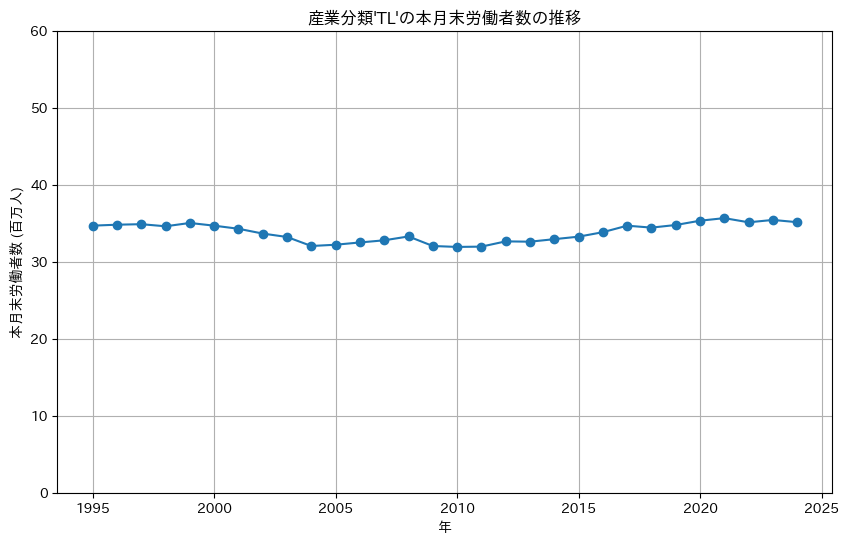

In [10]:
# 産業分類"TL"の本月末労働者数を確認する
t_data = all_data[all_data["産業分類"] == "TL"]
t_data = t_data[["年", "本月末労働者数"]]

plt.figure(figsize=(10,6))
plt.plot(t_data["年"], (t_data["本月末労働者数"] / 1000000), marker='o')
plt.title("産業分類'TL'の本月末労働者数の推移")
plt.ylim(0, 60)
plt.grid(True)
plt.xlabel("年")
plt.ylabel("本月末労働者数 (百万人)")
plt.show()

In [396]:
t_data.head()

,年,本月末労働者数
2832,1995,34684417.0
3025,1996,34807220.0
3216,1997,34875234.0
3407,1998,34602074.0
3598,1999,35032956.0


## EDA

### 製造業の対他産業賃金比

#### 全規模

In [40]:
all_wages = all_data[["年","産業分類","規模","現金給与総額"]]
all_wages.head()

,年,産業分類,規模,現金給与総額
0,1960,C,0.0,26250.0
1,1960,D,0.0,21213.0
2,1960,E,0.0,23097.9
3,1960,F,0.0,36178.0
4,1960,C,4.0,28786.0


In [42]:
# 規模ごとに分かれているデータを、平均して統一
all_wages = all_wages.groupby(["年", "産業分類"]).mean(numeric_only=True).reset_index()
all_wages.head()

,年,産業分類,規模,現金給与総額
0,1960,C,4.0,24071.00
1,1960,D,4.0,21433.25
2,1960,E,4.0,22637.30
3,1960,F,4.0,36734.00
4,1961,C,4.0,26290.75


In [43]:
# 不要な列をドロップ
all_wages = all_wages.drop(columns=["規模"])

In [44]:
# その年の製造業に対する賃金比率を計算、小数点第3位まで
all_wages["製造業賃金比率"] = all_wages.apply(lambda row: round(row["現金給与総額"] / all_wages[(all_wages["年"] == row["年"]) & (all_wages["産業分類"] == "E")]["現金給与総額"].values[0], 3), axis=1)
all_wages.head()

,年,産業分類,現金給与総額,製造業賃金比率
0,1960,C,24071.00,1.063
1,1960,D,21433.25,0.947
2,1960,E,22637.30,1.000
3,1960,F,36734.00,1.623
4,1961,C,26290.75,1.059


In [49]:
# 1995年以降のデータを抽出
all_wages = all_wages[all_wages["年"] >= 1995]

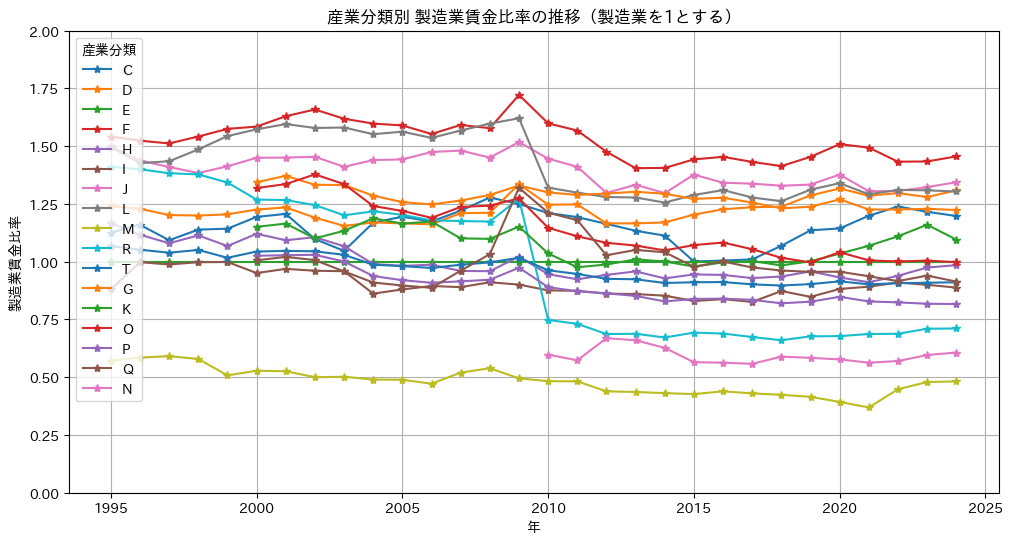

In [50]:
# 各産業別に線を分けて、折れ線グラフでプロット
plt.figure(figsize=(12, 6))

for industry in all_wages["産業分類"].unique():
    industry_data = all_wages[all_wages["産業分類"] == industry]
    plt.plot(industry_data["年"], industry_data["製造業賃金比率"], marker='*', label=industry)

plt.xlabel("年")
plt.ylabel("製造業賃金比率")
plt.ylim(0.0, 2.0)
plt.title("産業分類別 製造業賃金比率の推移（製造業を1とする）")
plt.legend(title="産業分類")
plt.grid(True)
plt.show()

- 以下の区別に分類する
    - 常に下回るもの
    - 交差するもの
    - 常に上回るもの

In [51]:
# 各産業分類を製造業賃金比率の値によって分類
cat_lower = []
cat_upper = []
cat_cross = []

for industry in all_wages["産業分類"].unique():
    industry_data = all_wages[all_wages["産業分類"] == industry]
    ratios = industry_data["製造業賃金比率"].values
    
    # すべての値が1.0より大きい
    if all(ratio > 1.0 for ratio in ratios):
        cat_upper.append(industry)
    # すべての値が1.0より小さい
    elif all(ratio < 1.0 for ratio in ratios):
        cat_lower.append(industry)
    # それ以外（交差する）
    else:
        cat_cross.append(industry)

print("常に上回る産業:", cat_upper)
print("常に下回る産業:", cat_lower)
print("交差する産業:", cat_cross)

常に上回る産業: ['C', 'D', 'F', 'J', 'L', 'G']
常に下回る産業: ['I', 'M', 'N']
交差する産業: ['E', 'H', 'R', 'T', 'K', 'O', 'P', 'Q']


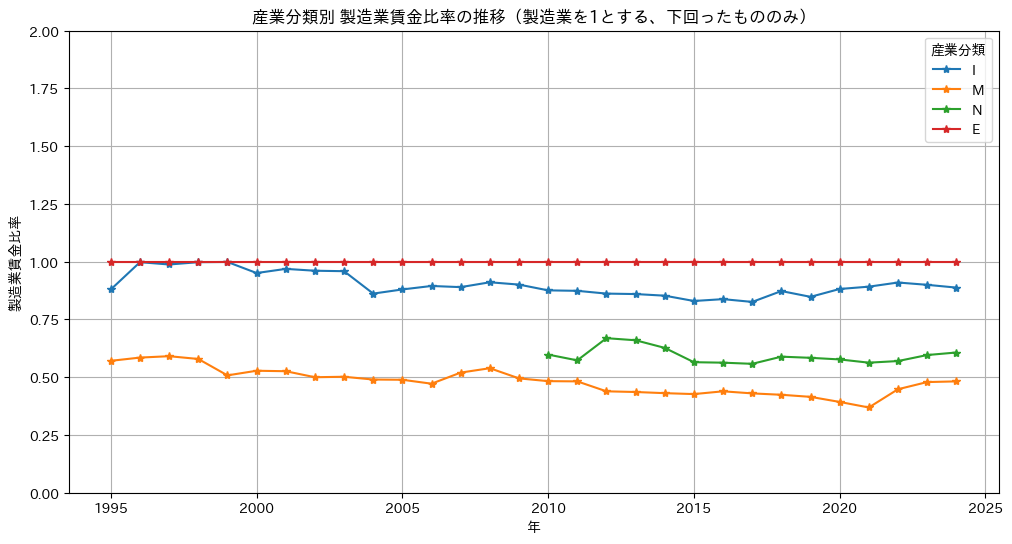

In [52]:
plt.figure(figsize=(12, 6))

cat_lower.append("E")

for industry in cat_lower:
    industry_data = all_wages[all_wages["産業分類"] == industry]
    plt.plot(industry_data["年"], industry_data["製造業賃金比率"], marker='*', label=industry)

plt.xlabel("年")
plt.ylabel("製造業賃金比率")
plt.ylim(0.0, 2.0)
plt.title("産業分類別 製造業賃金比率の推移（製造業を1とする、下回ったもののみ）")
plt.legend(title="産業分類")
plt.grid(True)
plt.show()

産業分類は
- M：宿泊業、飲食サービス業
- N：生活関連サービス業、娯楽業

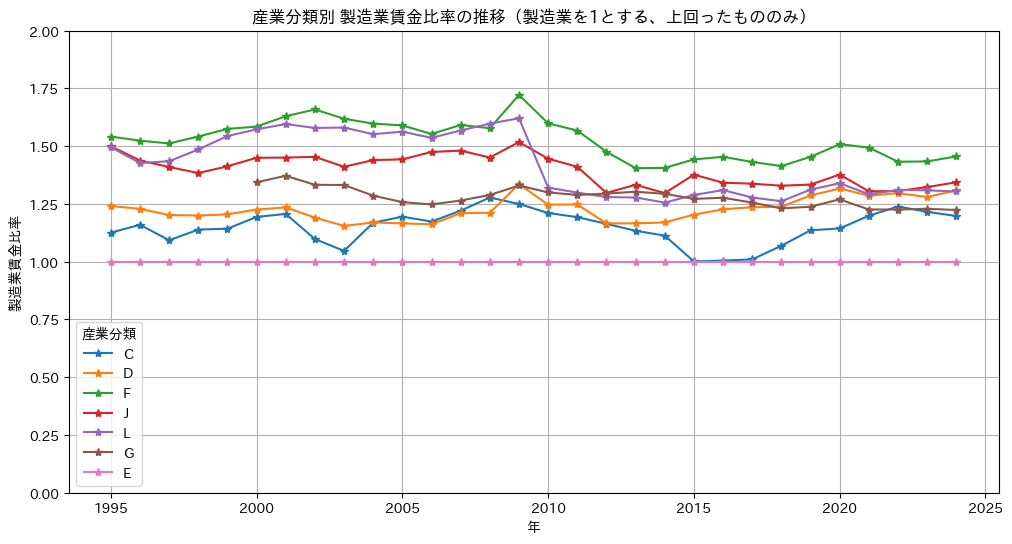

In [53]:
plt.figure(figsize=(12, 6))

cat_upper.append("E")

for industry in cat_upper:
    industry_data = all_wages[all_wages["産業分類"] == industry]
    plt.plot(industry_data["年"], industry_data["製造業賃金比率"], marker='*', label=industry)

plt.xlabel("年")
plt.ylabel("製造業賃金比率")
plt.ylim(0.0, 2.0)
plt.title("産業分類別 製造業賃金比率の推移（製造業を1とする、上回ったもののみ）")
plt.legend(title="産業分類")
plt.grid(True)
plt.show()

産業分類は
- F：電気・ガス・熱供給・水道業
- J：金融業、保険業
- L：学術研究、専門・技術サービス業
- G：情報通信業

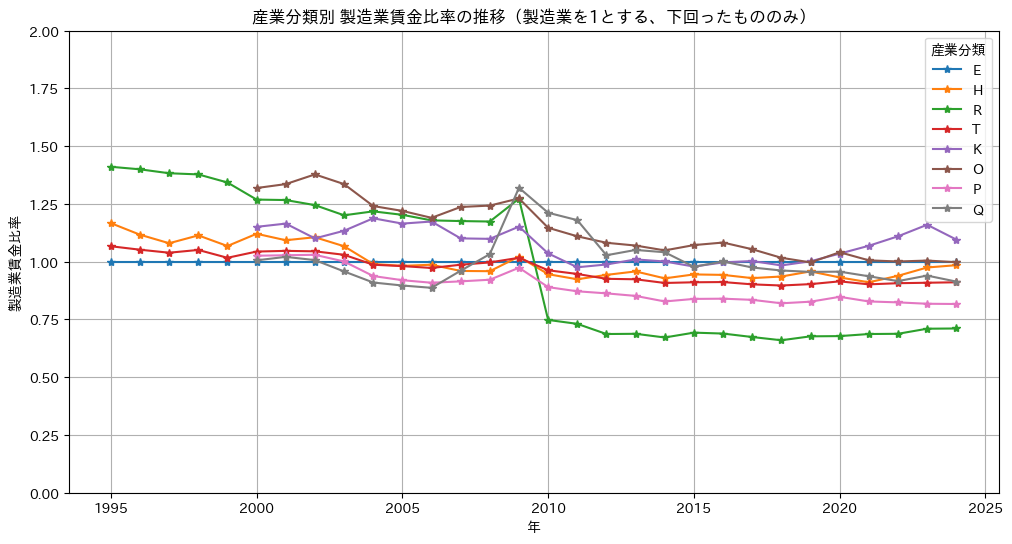

In [54]:
plt.figure(figsize=(12, 6))


for industry in cat_cross:
    industry_data = all_wages[all_wages["産業分類"] == industry]
    plt.plot(industry_data["年"], industry_data["製造業賃金比率"], marker='*', label=industry)

plt.xlabel("年")
plt.ylabel("製造業賃金比率")
plt.ylim(0.0, 2.0)
plt.title("産業分類別 製造業賃金比率の推移（製造業を1とする、下回ったもののみ）")
plt.legend(title="産業分類")
plt.grid(True)
plt.show()

企業規模によっても、賃金は異なる。
特に日本は[全企業数の99.7%が中小企業](https://www.smrj.go.jp/recruit/environment.html)と言われており、データはロングテールになっていることを考慮すべきだと考える。
大企業と中小企業を分けて考えるべきではないか。

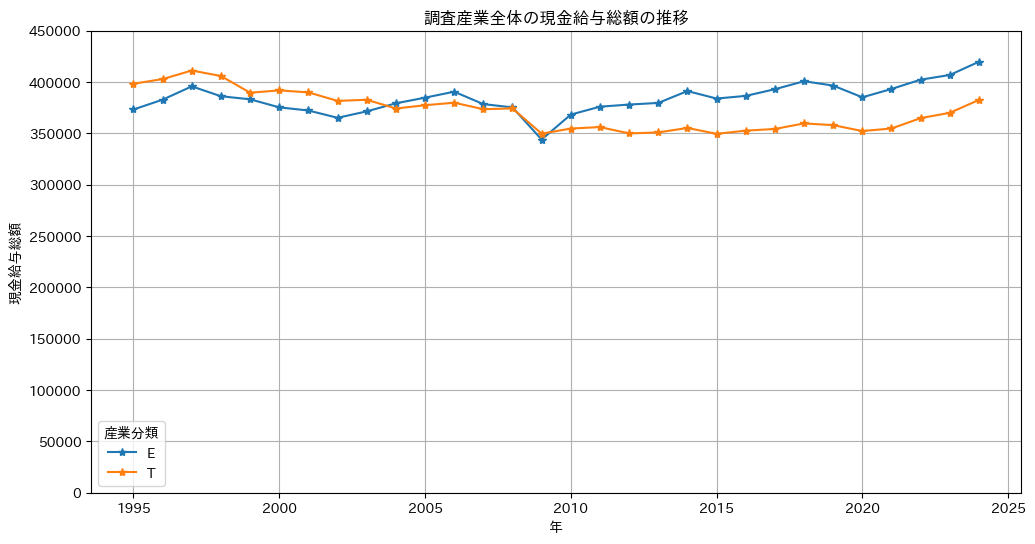

In [58]:
# E（製造業）とT（調査産業計）のみでプロット
all_wages_e_t = all_wages[all_wages["産業分類"].isin(["E", "T"])]
plt.figure(figsize=(12, 6))

for industry in all_wages_e_t["産業分類"].unique():
    industry_data = all_wages_e_t[all_wages_e_t["産業分類"] == industry]
    plt.plot(industry_data["年"], industry_data["現金給与総額"], marker='*', label=industry)

plt.xlabel("年")
plt.ylabel("現金給与総額")
plt.ylim(0, 450000)
plt.title("調査産業全体の現金給与総額の推移")
plt.legend(title="産業分類")
plt.grid(True)
plt.show()

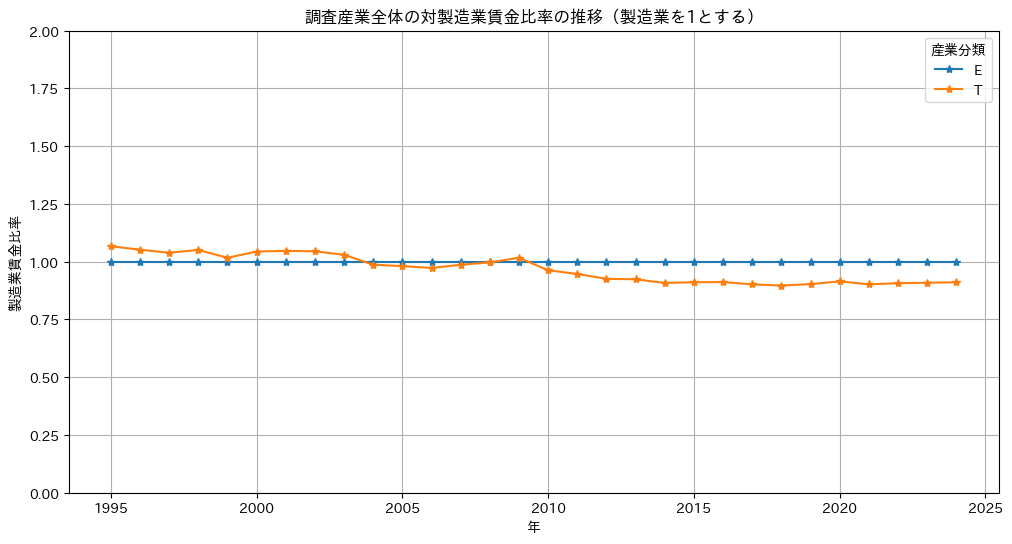

In [59]:
# E（製造業）とT（調査産業計）のみでプロット
all_wages_e_t = all_wages[all_wages["産業分類"].isin(["E", "T"])]
plt.figure(figsize=(12, 6))

for industry in all_wages_e_t["産業分類"].unique():
    industry_data = all_wages_e_t[all_wages_e_t["産業分類"] == industry]
    plt.plot(industry_data["年"], industry_data["製造業賃金比率"], marker='*', label=industry)

plt.xlabel("年")
plt.ylabel("製造業賃金比率")
plt.ylim(0.0, 2.0)
plt.title("調査産業全体の対製造業賃金比率の推移（製造業を1とする）")
plt.legend(title="産業分類")
plt.grid(True)
plt.show()

#### 大企業と中小企業を考慮した賃金比

[中小企業・小規模企業者の定義](https://www.chusho.meti.go.jp/soshiki/teigi.html)
- データの区別が細かくないため、今回は100人未満を中小企業、100人以上を大企業とする

In [44]:
wages = all_data[["年","月","産業分類", "規模", "就業形態", "現金給与総額"]]
wages.head()

,年,月,産業分類,規模,就業形態,現金給与総額
0,1960,CY,C,0,0,26250
1,1960,CY,C,4,0,28786
2,1960,CY,C,5,0,22422
3,1960,CY,C,7,0,18826
4,1960,CY,D,0,0,21213


In [45]:
wages["規模"].unique()

array(['0', '4', '5', '7', '9', 'T'], dtype=object)

In [46]:
# 規模によりデータを分割する
# 4,5を大企業、それ以外を中小企業とする
companies_l = wages[wages["規模"].isin(["4", "5"])]
companies_sm = wages[~wages["規模"].isin(["4", "5", "0", "T"])]

In [47]:
companies_l.head()

,年,月,産業分類,規模,就業形態,現金給与総額
1,1960,CY,C,4,0,28786
2,1960,CY,C,5,0,22422
5,1960,CY,D,4,0,24597
6,1960,CY,D,5,0,20781
9,1960,CY,E,4,0,28690


In [48]:
companies_sm.head()

,年,月,産業分類,規模,就業形態,現金給与総額
3,1960,CY,C,7,0,18826
7,1960,CY,D,7,0,19142
11,1960,CY,E,7,0,16897
15,1960,CY,E12,7,0,14624
19,1960,CY,E13,7,0,15848


In [49]:
# 月 = CY のみのデータを抽出
companies_l = companies_l[companies_l["月"] == "CY"]
companies_sm = companies_sm[companies_sm["月"] == "CY"]

In [50]:
# 産業分類が細かくなっているものを、統一（例：E12 => E）
companies_l["産業分類"] = companies_l["産業分類"].str.slice(0,1)
companies_l["産業分類"].unique()

companies_sm["産業分類"] = companies_sm["産業分類"].str.slice(0,1)
companies_sm["産業分類"].unique()

array(['C', 'D', 'E', 'F', 'T', 'G', 'H', 'I', 'J', 'O', 'P', 'Q', 'K',
       'L', 'M', 'N', 'R'], dtype=object)

In [51]:
# 数値列を数値型に変換
companies_l["現金給与総額"] = pd.to_numeric(companies_l["現金給与総額"], errors='coerce')
companies_l["規模"] = pd.to_numeric(companies_l["規模"], errors='coerce')

companies_sm["現金給与総額"] = pd.to_numeric(companies_sm["現金給与総額"], errors='coerce')
companies_sm["規模"] = pd.to_numeric(companies_sm["規模"], errors='coerce')

# 規模ごとに分かれているデータを、それぞれ平均して統一
companies_l = companies_l.groupby(["年", "月", "産業分類", "就業形態"]).mean(numeric_only=True).reset_index()
companies_l.head()

companies_sm = companies_sm.groupby(["年", "月", "産業分類", "就業形態"]).mean(numeric_only=True).reset_index()
companies_sm.head()

,年,月,産業分類,就業形態,規模,現金給与総額
0,1960,CY,C,0,7.0,18826.0
1,1960,CY,D,0,7.0,19142.0
2,1960,CY,E,0,7.0,17974.9
3,1960,CY,F,0,7.0,33641.0
4,1961,CY,C,0,7.0,20832.0


In [52]:
# 就業形態が0（全形態）のみを抽出
companies_l = companies_l[companies_l["就業形態"] == 0]
companies_sm = companies_sm[companies_sm["就業形態"] == 0]

# 不要な列をドロップ
companies_l = companies_l.drop(columns=["月","規模","就業形態"])
companies_sm = companies_sm.drop(columns=["月","規模","就業形態"])

In [53]:
# その年の製造業に対する賃金比率を計算、小数点第3位まで
companies_l["製造業賃金比率"] = companies_l.apply(lambda row: round(row["現金給与総額"] / companies_l[(companies_l["年"] == row["年"]) & (companies_l["産業分類"] == "E")]["現金給与総額"].values[0], 3), axis=1)
companies_l.head()

companies_sm["製造業賃金比率"] = companies_sm.apply(lambda row: round(row["現金給与総額"] / companies_sm[(companies_sm["年"] == row["年"]) & (companies_sm["産業分類"] == "E")]["現金給与総額"].values[0], 3), axis=1)
companies_sm.head()

,年,産業分類,現金給与総額,製造業賃金比率
0,1960,C,18826.0,1.047
1,1960,D,19142.0,1.065
2,1960,E,17974.9,1.000
3,1960,F,33641.0,1.872
4,1961,C,20832.0,1.045


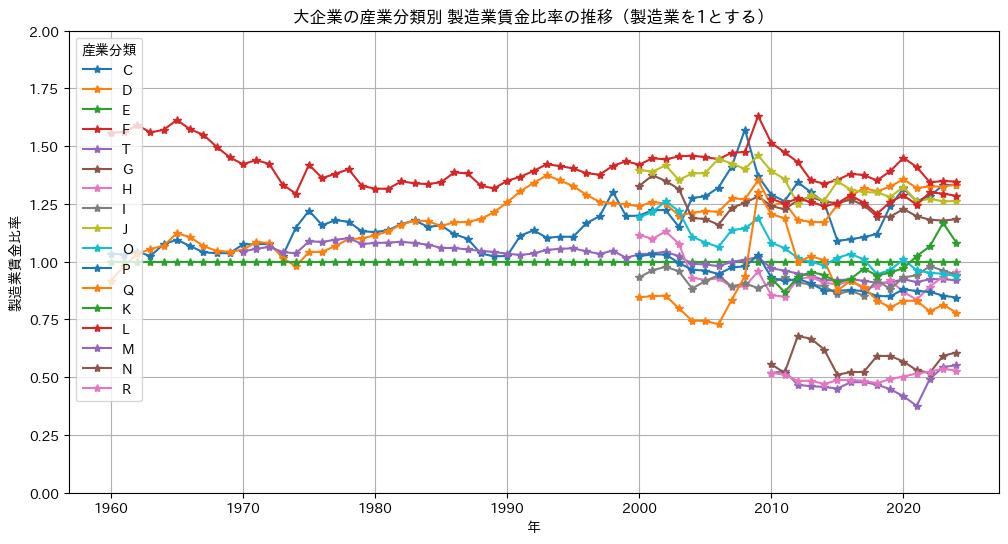

In [54]:
# 各産業別に線を分けて、折れ線グラフでプロット
plt.figure(figsize=(12, 6))

for industry in companies_l["産業分類"].unique():
    industry_data = companies_l[companies_l["産業分類"] == industry]
    plt.plot(industry_data["年"], industry_data["製造業賃金比率"], marker='*', label=industry)

plt.xlabel("年")
plt.ylabel("製造業賃金比率")
plt.ylim(0.0, 2.0)
plt.title("大企業の産業分類別 製造業賃金比率の推移（製造業を1とする）")
plt.legend(title="産業分類")
plt.grid(True)
plt.show()

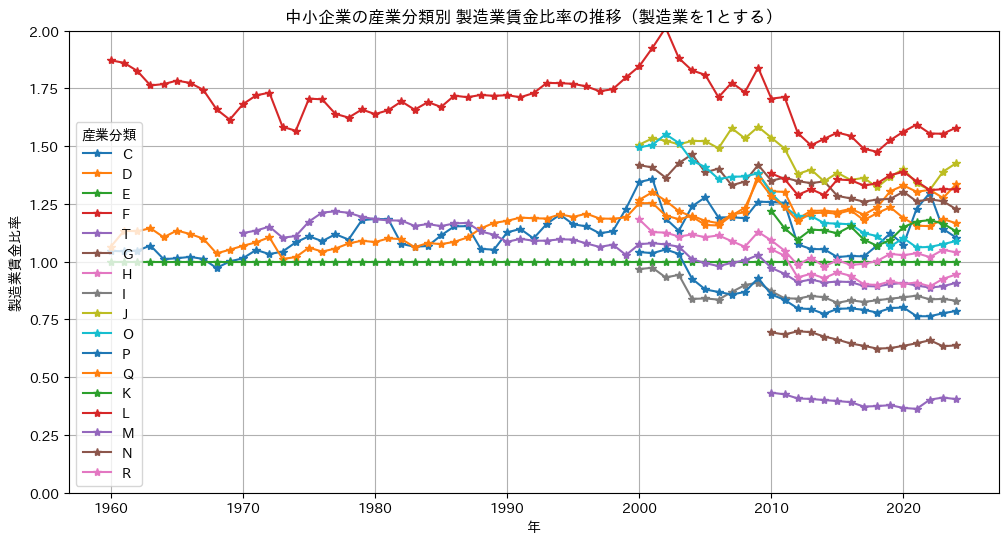

In [55]:
# 各産業別に線を分けて、折れ線グラフでプロット
plt.figure(figsize=(12, 6))

for industry in companies_sm["産業分類"].unique():
    industry_data = companies_sm[companies_sm["産業分類"] == industry]
    plt.plot(industry_data["年"], industry_data["製造業賃金比率"], marker='*', label=industry)

plt.xlabel("年")
plt.ylabel("製造業賃金比率")
plt.ylim(0.0, 2.0)
plt.title("中小企業の産業分類別 製造業賃金比率の推移（製造業を1とする）")
plt.legend(title="産業分類")
plt.grid(True)
plt.show()

- F：電気・ガス・熱供給・水道業　は常に高い（特に中小企業において）

### 可処分所得

「現金給与総額」はボーナスや残業代も含むので、「きまって支給する給与」を使用する

In [86]:
actual_wages = all_data[["年","月","産業分類", "規模", "就業形態", "きまって支給する給与"]]
actual_wages.head()

,年,月,産業分類,規模,就業形態,きまって支給する給与
0,1960,CY,C,0,0,22547.0
1,1960,CY,C,4,0,24682.0
2,1960,CY,C,5,0,19121.0
3,1960,CY,C,7,0,16814.0
4,1960,CY,D,0,0,17952.0


In [87]:
# 月 = CY のみのデータを抽出
actual_wages = actual_wages[actual_wages["月"] == "CY"]

In [88]:
# 産業分類が細かくなっているものを、統一（例：E12 => E）
actual_wages["産業分類"] = actual_wages["産業分類"].str.slice(0,1)
actual_wages["産業分類"].unique()

array(['C', 'D', 'E', 'F', 'T', 'H', 'I', 'J', 'M', 'L', 'R', 'G', 'K',
       'O', 'P', 'Q', 'N'], dtype=object)

In [89]:
# 規模によりデータを分割する
# 4,5を大企業、それ以外を中小企業とする
actual_wages_l = actual_wages[actual_wages["規模"].isin(["4", "5"])]
actual_wages_sm = actual_wages[~actual_wages["規模"].isin(["4", "5", "0", "T"])]

In [90]:
# 数値列を数値型に変換
actual_wages_l.loc[:, "きまって支給する給与"] = pd.to_numeric(actual_wages_l["きまって支給する給与"], errors='coerce')

actual_wages_sm.loc[:, "きまって支給する給与"] = pd.to_numeric(actual_wages_sm["きまって支給する給与"], errors='coerce')

# 規模ごとに分かれているデータを、平均して統一
actual_wages_l = actual_wages_l.groupby(["年", "月", "産業分類", "就業形態"]).mean(numeric_only=True).reset_index()
actual_wages_l.head()

actual_wages_sm = actual_wages_sm.groupby(["年", "月", "産業分類", "就業形態"]).mean(numeric_only=True).reset_index()
actual_wages_sm.head()

,年,月,産業分類,就業形態,きまって支給する給与
0,1960,CY,C,0,16814.0
1,1960,CY,D,0,16821.0
2,1960,CY,E,0,15787.5
3,1960,CY,F,0,25643.0
4,1961,CY,C,0,18160.0


In [91]:
# 就業形態が0（全形態）のみを抽出
actual_wages_l = actual_wages_l[actual_wages_l["就業形態"] == 0]
actual_wages_sm = actual_wages_sm[actual_wages_sm["就業形態"] == 0]
    
# 不要な列をドロップ
actual_wages_l = actual_wages_l.drop(columns=["月","就業形態"])
actual_wages_sm = actual_wages_sm.drop(columns=["月","就業形態"])

In [92]:
actual_wages_l.head()

,年,産業分類,きまって支給する給与
0,1960,C,21901.5
1,1960,D,18802.0
2,1960,E,20000.5
3,1960,F,29204.5
4,1961,C,23302.0


非消費支出を計算するのは面倒…。

単純に、
（非消費支出）=（きまって支給する給与） - （消費支出）/ 12
とする。

※毎月勤労統計調査の給与は、月給。

In [100]:
kakei_data = pd.read_csv('./data/kakei/kakei-data_solo_cleaned.csv', encoding='utf_8_sig', low_memory=False)
kakei_data.head()

,年,消費支出
0,2007,2298536
1,2008,2343049
2,2009,2221595
3,2010,2183543
4,2011,2188517


In [101]:
# 消費支出の値は年額なので、月額に変換（小数点以下四捨五入）
kakei_data["消費支出"] = round(kakei_data["消費支出"] / 12)
kakei_data.head()

,年,消費支出
0,2007,191545.0
1,2008,195254.0
2,2009,185133.0
3,2010,181962.0
4,2011,182376.0


計算できるのは2007年～2024年まで。

In [102]:
# actual_wages_l と actual_wages_sm を、2007年以降のデータのみを抽出
actual_wages_l = actual_wages_l[actual_wages_l["年"] >= 2007]
actual_wages_sm = actual_wages_sm[actual_wages_sm["年"] >= 2007]

In [103]:
# actual_wages_l と kakei_data を年で結合
merged_l = pd.merge(actual_wages_l, kakei_data, on="年", how="inner")
merged_l.head()

,年,産業分類,きまって支給する給与,消費支出
0,2007,C,439345.0000,191545.0
1,2007,D,439153.0000,191545.0
2,2007,E,340187.6875,191545.0
3,2007,F,486766.5000,191545.0
4,2007,G,416375.5000,191545.0


### 1995年（30年前）を基準とした雇用指数

In [29]:
all_employees = all_data[["年","月","産業分類", "規模", "就業形態", "現金給与総額","本月末労働者数","パートタイム労働者数"]]
all_employees.head()

,年,月,産業分類,規模,就業形態,現金給与総額,本月末労働者数,パートタイム労働者数
0,1960,CY,C,0,0,26250,NaN,NaN
1,1960,CY,C,4,0,28786,NaN,NaN
2,1960,CY,C,5,0,22422,NaN,NaN
3,1960,CY,C,7,0,18826,NaN,NaN
4,1960,CY,D,0,0,21213,NaN,NaN


In [30]:
# 月 = CY のみのデータを抽出
all_employees = all_employees[all_employees["月"] == "CY"]

In [31]:
# 産業分類が細かくなっているものを、統一（例：E12 => E）
all_employees["産業分類"] = all_employees["産業分類"].str.slice(0,1)
all_employees["産業分類"].unique()

array(['C', 'D', 'E', 'F', 'T', 'H', 'I', 'J', 'M', 'L', 'R', 'G', 'K',
       'O', 'P', 'Q', 'N'], dtype=object)

In [32]:
# 数値列を数値型に変換
all_employees["現金給与総額"] = pd.to_numeric(all_employees["現金給与総額"], errors='coerce')
all_employees["本月末労働者数"] = pd.to_numeric(all_employees["本月末労働者数"], errors='coerce')
all_employees["パートタイム労働者数"] = pd.to_numeric(all_employees["パートタイム労働者数"], errors='coerce')
all_employees["規模"] = pd.to_numeric(all_employees["規模"], errors='coerce')

# 規模ごとに分かれているデータを、平均して統一
all_employees = all_employees.groupby(["年", "月", "産業分類", "就業形態"]).mean(numeric_only=True).reset_index()
all_employees.head()

,年,月,産業分類,就業形態,規模,現金給与総額,本月末労働者数,パートタイム労働者数
0,1960,CY,C,0,4.0,24071.00,NaN,NaN
1,1960,CY,D,0,4.0,21433.25,NaN,NaN
2,1960,CY,E,0,4.0,22637.30,NaN,NaN
3,1960,CY,F,0,4.0,36734.00,NaN,NaN
4,1961,CY,C,0,4.0,26290.75,NaN,NaN


In [33]:
# 就業形態が0（全形態）のみを抽出
all_employees = all_employees[all_employees["就業形態"] == 0]

# 不要な列をドロップ
all_employees = all_employees.drop(columns=["月","規模","就業形態"])

In [34]:
# 本月末労働者数とパートタイム労働者数を、小数点以下切り上げ
all_employees["本月末労働者数"] = np.ceil(all_employees["本月末労働者数"])
all_employees["パートタイム労働者数"] = np.ceil(all_employees["パートタイム労働者数"])

In [35]:
# 1995年以降のデータを抽出
all_employees = all_employees[all_employees["年"] >= 1995]

In [36]:
# 1995年の本月末労働者数を基準に、各年の労働者数を各産業ごとに指数化（小数点第3位まで）
all_employees = all_employees.merge(
    all_employees[all_employees["年"] == 1995][["産業分類", "本月末労働者数"]].rename(columns={"本月末労働者数": "基準労働者数"}),
    on="産業分類",
    how="left"
)
all_employees["労働者数指数"] = round(all_employees["本月末労働者数"] / all_employees["基準労働者数"], 3)
all_employees.head()

,年,産業分類,現金給与総額,本月末労働者数,パートタイム労働者数,基準労働者数,労働者数指数
0,1995,C,411388.500000,26535.0,710.0,26535.0,1.0
1,1995,D,429623.083333,1259773.0,41194.0,1259773.0,1.0
2,1995,E,370957.833333,681414.0,59752.0,681414.0,1.0
3,1995,F,577502.375000,153320.0,2238.0,153320.0,1.0
4,1995,H,429780.000000,621037.0,31483.0,621037.0,1.0


In [44]:
# 1995年の現金給与総額を基準に、各年の賃金を各産業ごとに指数化（小数点第3位まで）
all_employees = all_employees.merge(
    all_employees[all_employees["年"] == 1995][["産業分類", "現金給与総額"]].rename(columns={"現金給与総額": "基準現金給与総額"}),
    on="産業分類",
    how="left"
)
all_employees["現金給与総額指数"] = round(all_employees["現金給与総額"] / all_employees["基準現金給与総額"], 3)
all_employees.head()

,年,産業分類,現金給与総額,本月末労働者数,パートタイム労働者数,基準労働者数,労働者数指数,基準現金給与総額,現金給与総額指数
0,1995,C,411388.500000,26535.0,710.0,26535.0,1.0,411388.500000,1.0
1,1995,D,429623.083333,1259773.0,41194.0,1259773.0,1.0,429623.083333,1.0
2,1995,E,370957.833333,681414.0,59752.0,681414.0,1.0,370957.833333,1.0
3,1995,F,577502.375000,153320.0,2238.0,153320.0,1.0,577502.375000,1.0
4,1995,H,429780.000000,621037.0,31483.0,621037.0,1.0,429780.000000,1.0


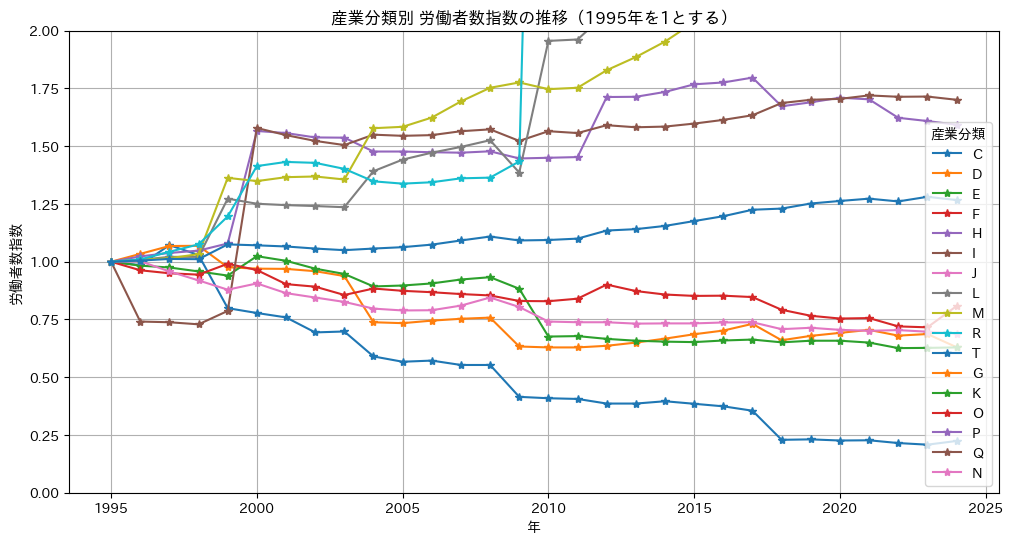

In [47]:
# 各産業別に線を分けて、折れ線グラフでプロット
plt.figure(figsize=(12, 6))

for industry in all_employees["産業分類"].unique():
    industry_data = all_employees[all_employees["産業分類"] == industry]
    plt.plot(industry_data["年"], industry_data["労働者数指数"], marker='*', label=industry)

plt.xlabel("年")
plt.ylabel("労働者数指数")
plt.ylim(0.0, 2.0)
plt.title("産業分類別 労働者数指数の推移（1995年を1とする）")
plt.legend(title="産業分類")
plt.grid(True)
plt.show()

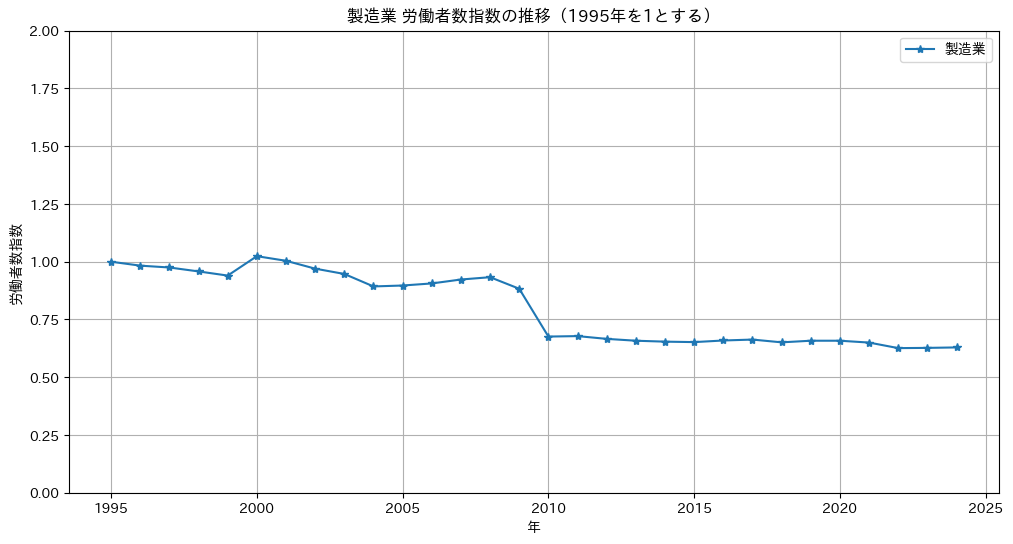

In [45]:
# 産業分類E（製造業）のみを抽出
e_employees = all_employees[all_employees["産業分類"] == "E"]

# グラフ化
plt.figure(figsize=(12, 6))
plt.plot(e_employees["年"], e_employees["労働者数指数"], marker='*', label="製造業")
plt.xlabel("年")
plt.ylabel("労働者数指数")
plt.ylim(0.0, 2.0)
plt.title("製造業 労働者数指数の推移（1995年を1とする）")
plt.legend()
plt.grid(True)
plt.show()

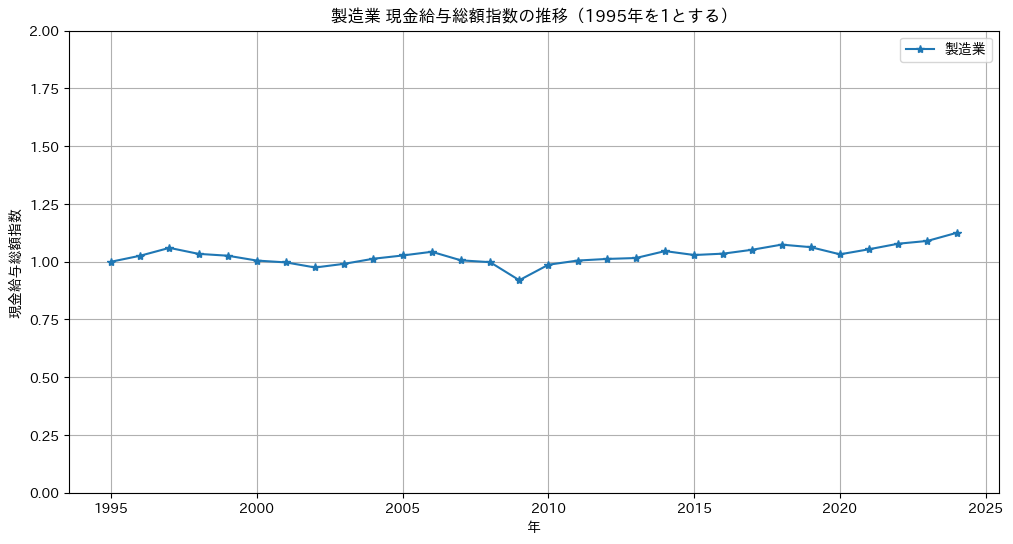

In [46]:
# 産業分類E（製造業）のみを抽出
e_employees = all_employees[all_employees["産業分類"] == "E"]

# グラフ化
plt.figure(figsize=(12, 6))
plt.plot(e_employees["年"], e_employees["現金給与総額指数"], marker='*', label="製造業")
plt.xlabel("年")
plt.ylabel("現金給与総額指数")
plt.ylim(0.0, 2.0)
plt.title("製造業 現金給与総額指数の推移（1995年を1とする）")
plt.legend()
plt.grid(True)
plt.show()

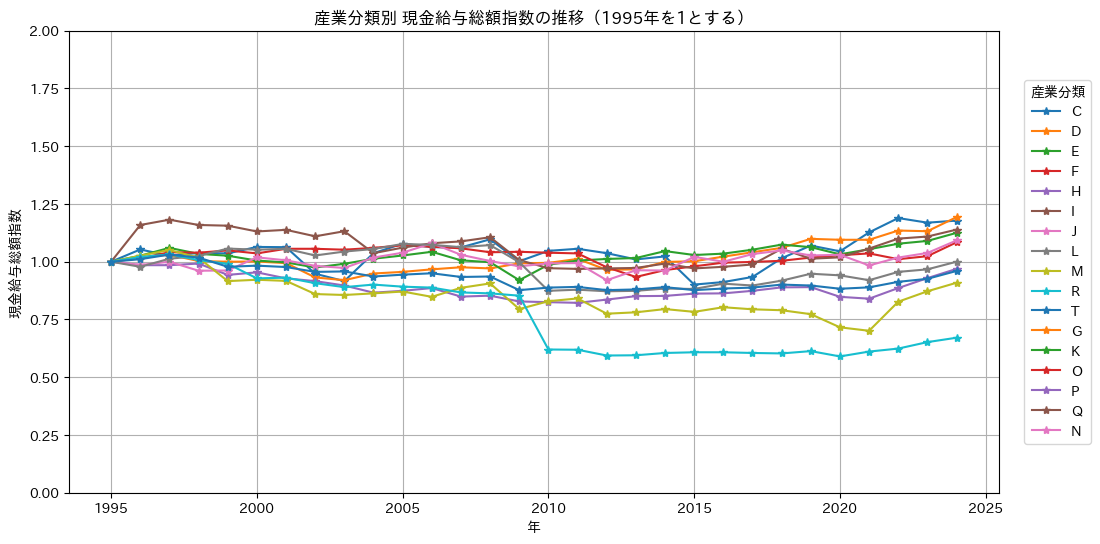

In [50]:
# 各産業別に線を分けて、折れ線グラフでプロット
plt.figure(figsize=(12, 6))

for industry in all_employees["産業分類"].unique():
    industry_data = all_employees[all_employees["産業分類"] == industry]
    plt.plot(industry_data["年"], industry_data["現金給与総額指数"], marker='*', label=industry)

plt.xlabel("年")
plt.ylabel("現金給与総額指数")
plt.ylim(0.0, 2.0)
plt.title("産業分類別 現金給与総額指数の推移（1995年を1とする）")
plt.legend(title="産業分類", loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.grid(True)
plt.show()

In [51]:
# 現金給与総額指数の、対製造業を計算
all_employees["現金給与総額指数対製造業"] = all_employees.apply(lambda row: round(row["現金給与総額指数"] / all_employees[(all_employees["年"] == row["年"]) & (all_employees["産業分類"] == "E")]["現金給与総額指数"].values[0], 3), axis=1)
all_employees.head()

,年,産業分類,現金給与総額,本月末労働者数,パートタイム労働者数,基準労働者数,労働者数指数,基準現金給与総額,現金給与総額指数,現金給与総額指数対製造業
0,1995,C,411388.500000,26535.0,710.0,26535.0,1.0,411388.500000,1.0,1.0
1,1995,D,429623.083333,1259773.0,41194.0,1259773.0,1.0,429623.083333,1.0,1.0
2,1995,E,370957.833333,681414.0,59752.0,681414.0,1.0,370957.833333,1.0,1.0
3,1995,F,577502.375000,153320.0,2238.0,153320.0,1.0,577502.375000,1.0,1.0
4,1995,H,429780.000000,621037.0,31483.0,621037.0,1.0,429780.000000,1.0,1.0


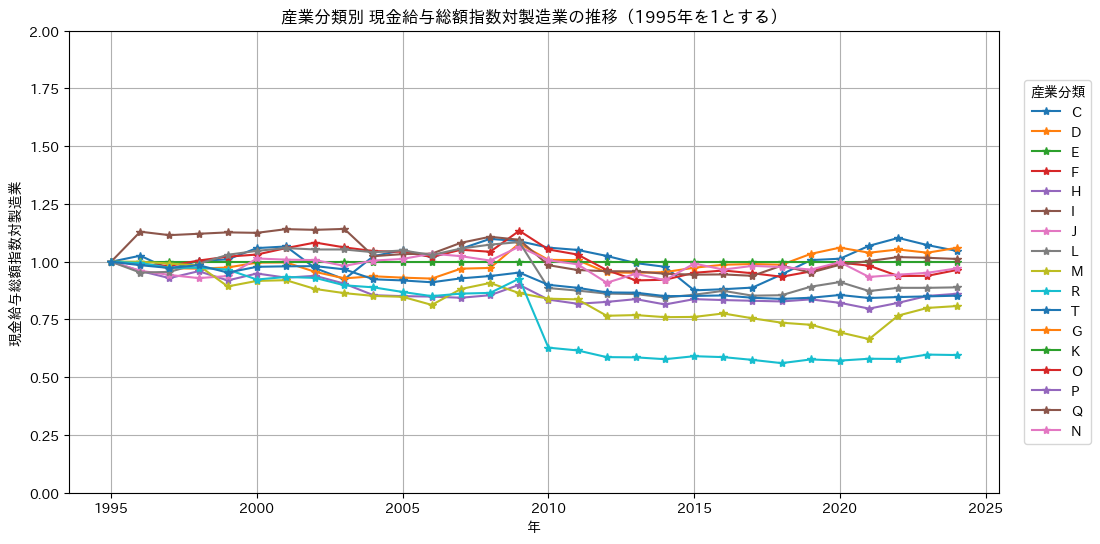

In [52]:
# 各産業別に線を分けて、折れ線グラフでプロット
plt.figure(figsize=(12, 6))

for industry in all_employees["産業分類"].unique():
    industry_data = all_employees[all_employees["産業分類"] == industry]
    plt.plot(industry_data["年"], industry_data["現金給与総額指数対製造業"], marker='*', label=industry)

plt.xlabel("年")
plt.ylabel("現金給与総額指数対製造業")
plt.ylim(0.0, 2.0)
plt.title("産業分類別 現金給与総額指数対製造業の推移（1995年を1とする）")
plt.legend(title="産業分類", loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.grid(True)
plt.show()

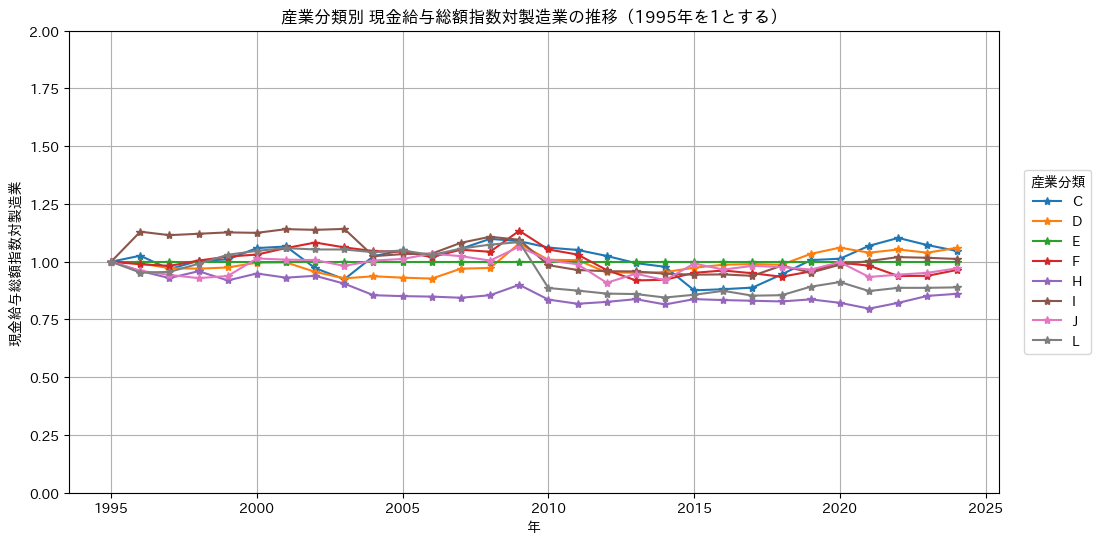

In [54]:
# 多すぎるので、産業分類カテゴリの半分ずつプロット
industries = all_employees["産業分類"].unique()
mid_index = len(industries) // 2
plt.figure(figsize=(12, 6))
for industry in industries[:mid_index]:
    industry_data = all_employees[all_employees["産業分類"] == industry]
    plt.plot(industry_data["年"], industry_data["現金給与総額指数対製造業"], marker='*', label=industry)

plt.xlabel("年")
plt.ylabel("現金給与総額指数対製造業")
plt.ylim(0.0, 2.0)
plt.title("産業分類別 現金給与総額指数対製造業の推移（1995年を1とする）")
plt.legend(title="産業分類", loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.grid(True)
plt.show()

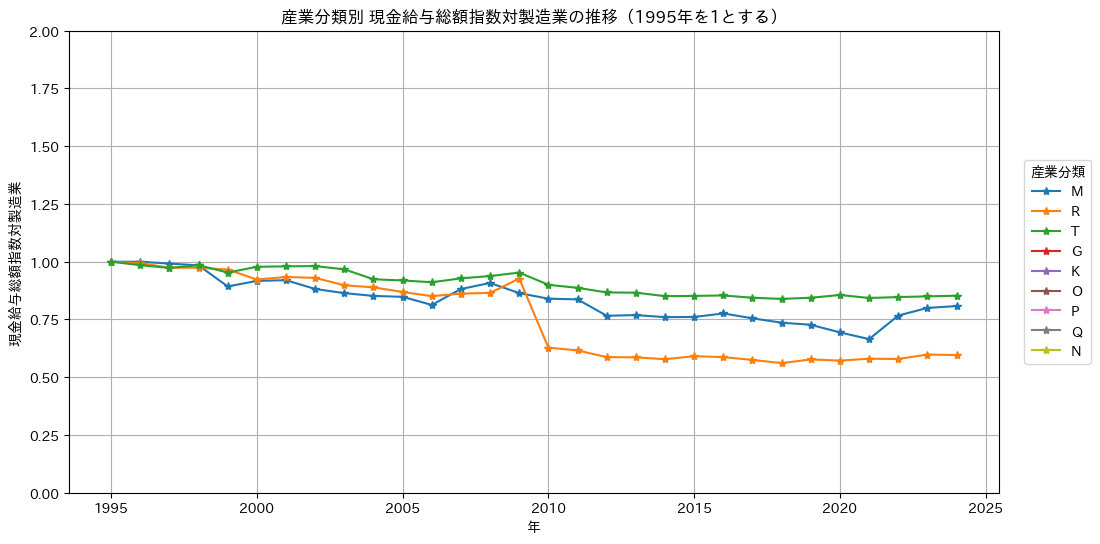

In [55]:
# もう半分をプロット
plt.figure(figsize=(12, 6))
for industry in industries[mid_index:]:
    industry_data = all_employees[all_employees["産業分類"] == industry]
    plt.plot(industry_data["年"], industry_data["現金給与総額指数対製造業"], marker='*', label=industry)
plt.xlabel("年")
plt.ylabel("現金給与総額指数対製造業")
plt.ylim(0.0, 2.0)
plt.title("産業分類別 現金給与総額指数対製造業の推移（1995年を1とする）")
plt.legend(title="産業分類", loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.grid(True)
plt.show()

### 雇用者数の割合

In [11]:
employees_data = all_data[["年","産業分類","本月末労働者数","増加労働者数","減少労働者数","パートタイム労働者数"]]

# 列をリネーム
employees_data = employees_data.rename(columns={
    "本月末労働者数": "労働者数",
    "増加労働者数": "増加労働者数",
    "減少労働者数": "減少労働者数",
})

employees_data.head()

,年,産業分類,労働者数,増加労働者数,減少労働者数,パートタイム労働者数
2662,1995,C,64123.0,664.0,756.0,NaN
2680,1995,D,3921455.0,72226.0,74583.0,NaN
2704,1995,E,9696646.0,94981.0,116329.0,NaN
2788,1995,F,320772.0,3454.0,3472.0,NaN
2832,1995,TL,34684417.0,481044.0,521868.0,NaN


In [12]:
# 各産業分類ごとに、その年の調査対象労働者数に対する労働者数割合を計算、小数点第3位まで
employees_data["労働者数割合"] = employees_data.apply(lambda row: round((row["労働者数"] / employees_data[(employees_data["年"] == row["年"]) & (employees_data["産業分類"] == "TL")]["労働者数"].values[0])*100, 3), axis=1)
employees_data.head()

,年,産業分類,労働者数,増加労働者数,減少労働者数,パートタイム労働者数,労働者数割合
2662,1995,C,64123.0,664.0,756.0,NaN,0.185
2680,1995,D,3921455.0,72226.0,74583.0,NaN,11.306
2704,1995,E,9696646.0,94981.0,116329.0,NaN,27.957
2788,1995,F,320772.0,3454.0,3472.0,NaN,0.925
2832,1995,TL,34684417.0,481044.0,521868.0,NaN,100.000


In [13]:
employees_data.to_csv('./data/maikin/employees_data.csv', encoding='utf_8_sig', index=False)

In [14]:
# 産業分類"TL"（調査産業計）のデータは、別のDataFrameに分離
t_employees_data = employees_data[employees_data["産業分類"] == "TL"]
employees_data = employees_data[employees_data["産業分類"] != "TL"]
t_employees_data.head()

,年,産業分類,労働者数,増加労働者数,減少労働者数,パートタイム労働者数,労働者数割合
2832,1995,TL,34684417.0,481044.0,521868.0,NaN,100.0
3025,1996,TL,34807220.0,494309.0,525878.0,NaN,100.0
3216,1997,TL,34875234.0,506725.0,537616.0,NaN,100.0
3407,1998,TL,34602074.0,470285.0,528309.0,NaN,100.0
3598,1999,TL,35032956.0,493899.0,537633.0,NaN,100.0


In [15]:
# 2024年時点での各産業分類の労働者数割合を取得
employees_2024 = employees_data[employees_data["年"] == 2024].groupby("産業分類")["労働者数割合"].mean().reset_index()
print("2024年の産業分類別労働者数割合:")
print(employees_2024.sort_values("労働者数割合", ascending=False))

# 1%未満の産業分類を"その他"に分類
minor_industries = employees_2024[employees_2024["労働者数割合"] < 1.0]["産業分類"].tolist()
print("\n1%未満の産業分類（その他に分類）:", minor_industries)

# 新しい産業分類列を作成
def reclassify_industry(industry):
    if industry == "E":
        return "E"  # 製造業は単独
    elif industry in minor_industries:
        return "その他"
    else:
        return industry

employees_data["産業分類_新"] = employees_data["産業分類"].apply(reclassify_industry)
print("\n新しい産業分類:")
print(employees_data["産業分類_新"].unique())

# "その他"のデータを集約
employees_data_grouped = employees_data.groupby(["年", "産業分類_新"]).agg({
    "労働者数": "sum",
    "労働者数割合": "sum",
    "増加労働者数": "sum",
    "減少労働者数": "sum",
    "パートタイム労働者数": "sum"
}).reset_index()

2024年の産業分類別労働者数割合:
   産業分類  労働者数割合
2     E  18.994
13    P  15.742
6     I  14.730
15    R   9.325
5     H   7.109
1     D   6.774
12    O   6.123
4     G   4.968
9     L   4.398
7     J   3.391
10    M   2.739
11    N   2.073
8     K   2.069
14    Q   0.812
3     F   0.719
0     C   0.035

1%未満の産業分類（その他に分類）: ['C', 'F', 'Q']

新しい産業分類:
['その他' 'D' 'E' 'G' 'H' 'I' 'J' 'O' 'P' 'K' 'L' 'M' 'N' 'R']


In [16]:
employees_data_grouped.head()

,年,産業分類_新,労働者数,労働者数割合,増加労働者数,減少労働者数,パートタイム労働者数
0,1995,D,3921455.0,11.306,72226.0,74583.0,0.0
1,1995,E,9696646.0,27.957,94981.0,116329.0,0.0
2,1995,その他,384895.0,1.110,4118.0,4228.0,0.0
3,1996,D,4068538.0,11.689,78229.0,77024.0,0.0
4,1996,E,9533723.0,27.390,94674.0,111510.0,0.0


In [17]:
import matplotlib.cm as cm

C:\Users\chika\AppData\Local\Temp\ipykernel_19700\1101237533.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap1 = cm.get_cmap('tab20', 20)
C:\Users\chika\AppData\Local\Temp\ipykernel_19700\1101237533.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap2 = cm.get_cmap('Set3', 12)
C:\Users\chika\AppData\Local\Temp\ipykernel_19700\1101237533.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap3 = cm.get_cmap('Paired', 12)


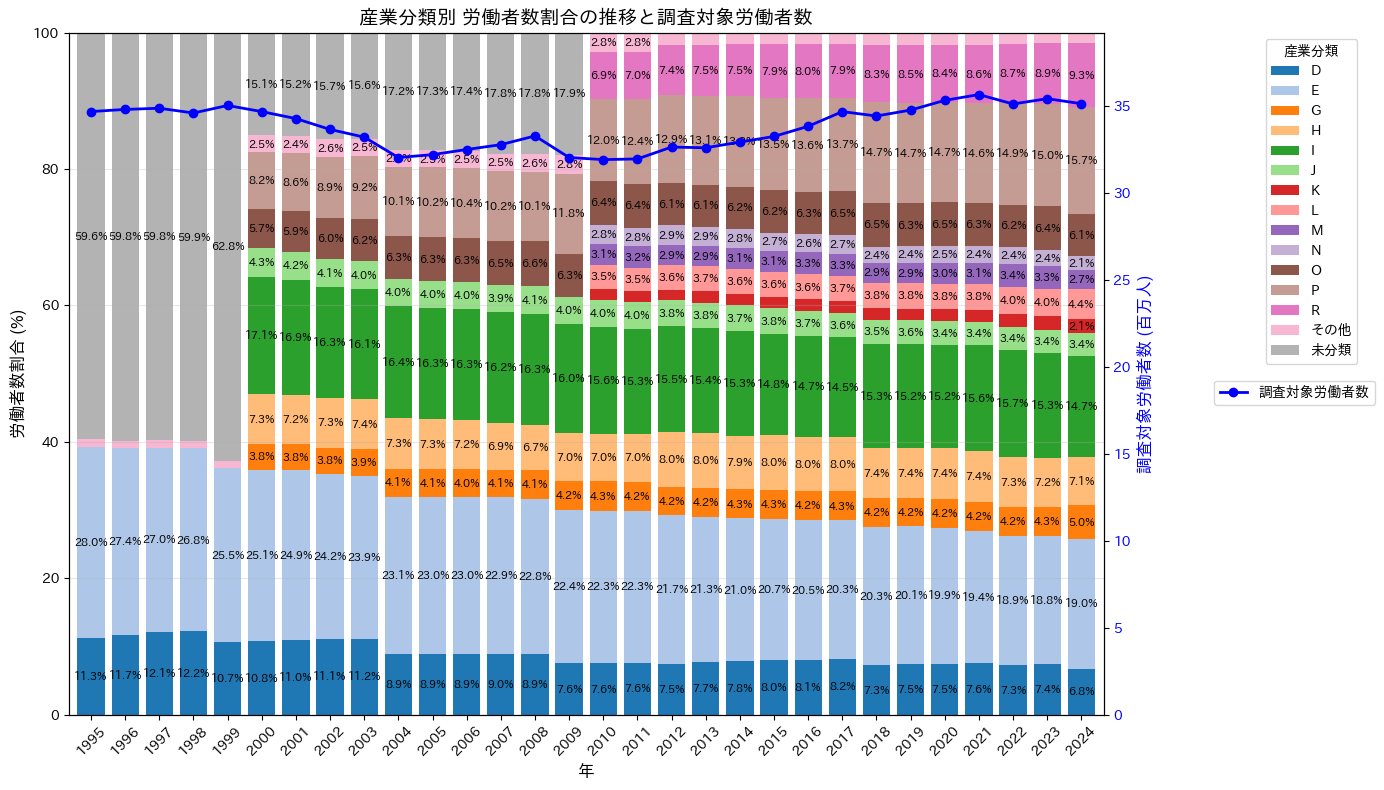

In [18]:
# ピボットテーブルを作成(年 × 産業分類_新)
pivot_data = employees_data_grouped.pivot(index="年", columns="産業分類_新", values="労働者数割合").fillna(0)

# 100%に満たない部分を「未分類」として追加
pivot_data["未分類"] = 100 - pivot_data.sum(axis=1)

# より多様な色を生成するため、複数のカラーマップを組み合わせる
n_colors = len(pivot_data.columns)

# 色のリストを作成（tab20、Set3、Pairedを組み合わせて多様性を確保）
colors = []
cmap1 = cm.get_cmap('tab20', 20)
cmap2 = cm.get_cmap('Set3', 12)
cmap3 = cm.get_cmap('Paired', 12)

for i in range(n_colors):
    if i < 20:
        colors.append(cmap1(i))
    elif i < 32:
        colors.append(cmap2(i - 20))
    else:
        colors.append(cmap3(i - 32))

# 未分類は灰色に設定
if "未分類" in pivot_data.columns:
    colors[-1] = (0.7, 0.7, 0.7, 1.0)  # グレー

# 2軸グラフを作成
fig, ax1 = plt.subplots(figsize=(14, 8))

# 帯グラフをプロット(棒グラフとして)
pivot_data.plot(kind='bar', stacked=True, ax=ax1, width=0.8, color=colors, legend=False)

# 各バーに労働者数割合の値を表示
for i, year in enumerate(pivot_data.index):
    y_offset = 0
    for col in pivot_data.columns:
        value = pivot_data.loc[year, col]
        if value > 2.0:  # type: ignore # 2%以上の場合のみ表示
            ax1.text(i, y_offset + value / 2, f'{value:.1f}%',  # type: ignore
                    ha='center', va='center', fontsize=8, color='black', fontweight='bold')
        y_offset += value # type: ignore

ax1.set_xlabel("年", fontsize=12)
ax1.set_ylabel("労働者数割合 (%)", fontsize=12)
ax1.set_ylim(0, 100)
ax1.tick_params(axis='y')
plt.xticks(rotation=45)
ax1.grid(axis='y', alpha=0.3)

# 第2軸を作成(調査対象労働者数の折れ線グラフ用)
ax2 = ax1.twinx()

# t_employees_dataから調査対象労働者数を取得
t_employees_sorted = t_employees_data.sort_values("年")

# 折れ線グラフをプロット(x座標はバーの位置に合わせる)
x_positions = range(len(pivot_data.index))
ax2.plot(x_positions, t_employees_sorted["労働者数"].values / 1000000,  # type: ignore
        color='blue', marker='o', linewidth=2, markersize=6, label='調査対象労働者数')

ax2.set_ylabel("調査対象労働者数 (百万人)", fontsize=12, color='blue')
ax2.set_ylim(0, t_employees_sorted["労働者数"].max() / 1000000 * 1.1)
ax2.tick_params(axis='y', labelcolor='blue')

# タイトルと凡例
plt.title("産業分類別 労働者数割合の推移と調査対象労働者数", fontsize=14)

# 凡例を作成(帯グラフ用と折れ線グラフ用を統合)
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# 帯グラフの凡例を左側に配置
ax1.legend(handles1, labels1, title="産業分類", bbox_to_anchor=(1.15, 1), loc='upper left')
# 折れ線グラフの凡例を右上に配置
ax2.legend(handles2, labels2, bbox_to_anchor=(1.1, 0.5) , loc='upper left')

plt.tight_layout()
plt.show()

C:\Users\chika\AppData\Local\Temp\ipykernel_19700\4153581822.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap1 = cm.get_cmap('tab20', 20)
C:\Users\chika\AppData\Local\Temp\ipykernel_19700\4153581822.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap2 = cm.get_cmap('Set3', 12)
C:\Users\chika\AppData\Local\Temp\ipykernel_19700\4153581822.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap3 = cm.get_cmap('Paired', 12)


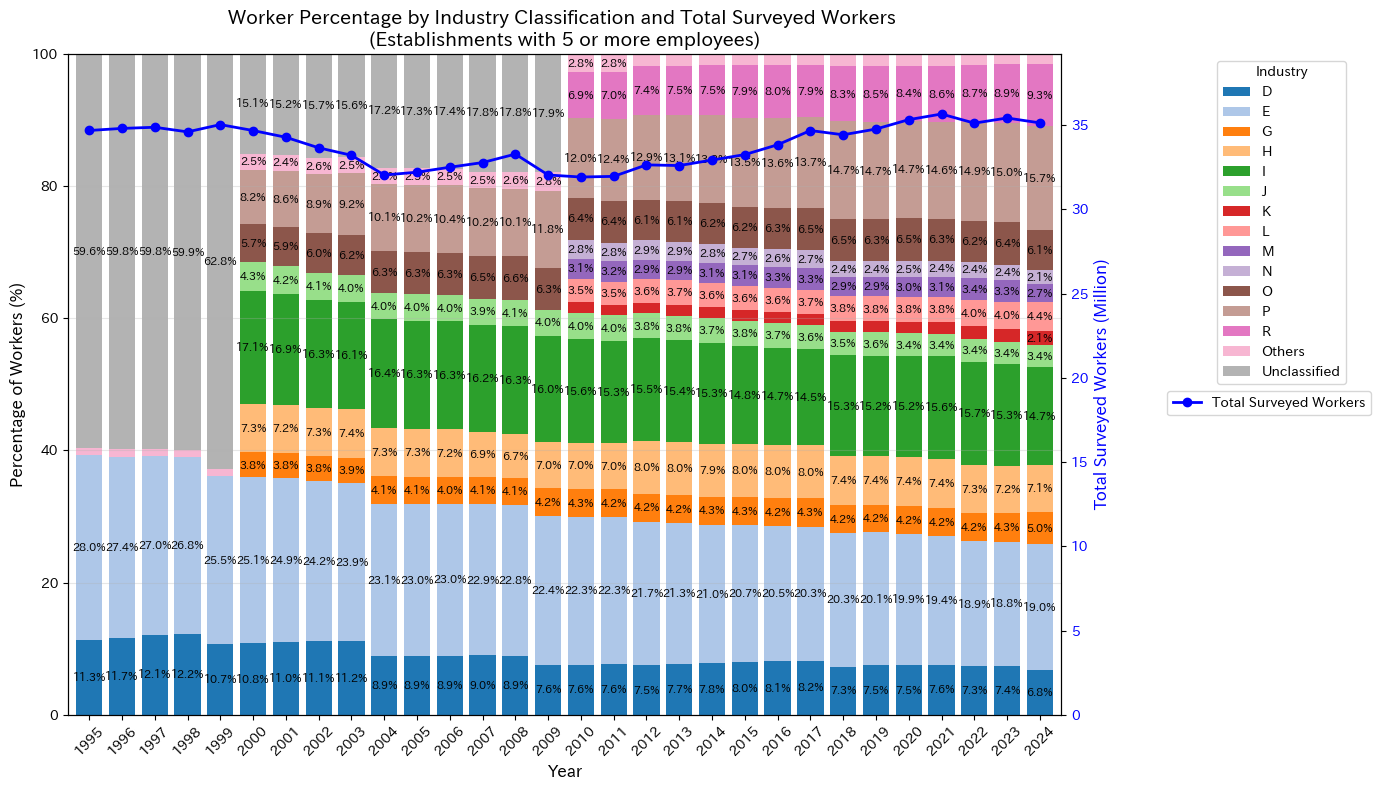

In [19]:
# ピボットテーブルを作成(年 × 産業分類_新)
pivot_data = employees_data_grouped.pivot(index="年", columns="産業分類_新", values="労働者数割合").fillna(0)

# 100%に満たない部分を「未分類」として追加
pivot_data["Unclassified"] = 100 - pivot_data.sum(axis=1)

# 列名を英語に変換
column_mapping = {
    "その他": "Others",
    "未分類": "Unclassified"
}
pivot_data = pivot_data.rename(columns=column_mapping)

# より多様な色を生成するため、複数のカラーマップを組み合わせる
n_colors = len(pivot_data.columns)

# 色のリストを作成（tab20、Set3、Pairedを組み合わせて多様性を確保）
colors = []
cmap1 = cm.get_cmap('tab20', 20)
cmap2 = cm.get_cmap('Set3', 12)
cmap3 = cm.get_cmap('Paired', 12)

for i in range(n_colors):
    if i < 20:
        colors.append(cmap1(i))
    elif i < 32:
        colors.append(cmap2(i - 20))
    else:
        colors.append(cmap3(i - 32))

# 未分類は灰色に設定
if "Unclassified" in pivot_data.columns:
    colors[-1] = (0.7, 0.7, 0.7, 1.0)  # グレー

# 2軸グラフを作成
fig, ax1 = plt.subplots(figsize=(14, 8))

# 帯グラフをプロット(棒グラフとして)
pivot_data.plot(kind='bar', stacked=True, ax=ax1, width=0.8, color=colors, legend=False)

# 各バーに労働者数割合の値を表示
for i, year in enumerate(pivot_data.index):
    y_offset = 0
    for col in pivot_data.columns:
        value = pivot_data.loc[year, col]
        if value > 2.0:  # type: ignore # 2%以上の場合のみ表示
            ax1.text(i, y_offset + value / 2, f'{value:.1f}%',  # type: ignore
                    ha='center', va='center', fontsize=8, color='black', fontweight='bold')
        y_offset += value # type: ignore

ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Percentage of Workers (%)", fontsize=12)
ax1.set_ylim(0, 100)
ax1.tick_params(axis='y')
plt.xticks(rotation=45)
ax1.grid(axis='y', alpha=0.3)

# 第2軸を作成(調査対象労働者数の折れ線グラフ用)
ax2 = ax1.twinx()

# t_employees_dataから調査対象労働者数を取得
t_employees_sorted = t_employees_data.sort_values("年")

# 折れ線グラフをプロット(x座標はバーの位置に合わせる)
x_positions = range(len(pivot_data.index))
ax2.plot(x_positions, t_employees_sorted["労働者数"].values / 1000000,  # type: ignore
        color='blue', marker='o', linewidth=2, markersize=6, label='Total Surveyed Workers')

ax2.set_ylabel("Total Surveyed Workers (Million)", fontsize=12, color='blue')
ax2.set_ylim(0, t_employees_sorted["労働者数"].max() / 1000000 * 1.1)
ax2.tick_params(axis='y', labelcolor='blue')

# タイトルと凡例
plt.title("Worker Percentage by Industry Classification and Total Surveyed Workers \n(Establishments with 5 or more employees)", fontsize=14)

# 凡例を作成(帯グラフ用と折れ線グラフ用を統合)
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# 帯グラフの凡例を左側に配置
ax1.legend(handles1, labels1, title="Industry", bbox_to_anchor=(1.15, 1), loc='upper left')
# 折れ線グラフの凡例を右上に配置
ax2.legend(handles2, labels2, bbox_to_anchor=(1.1, 0.5) , loc='upper left')

plt.tight_layout()
plt.show()

C:\Users\chika\AppData\Local\Temp\ipykernel_19700\2562081215.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap1 = cm.get_cmap('tab20', 20)
C:\Users\chika\AppData\Local\Temp\ipykernel_19700\2562081215.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap2 = cm.get_cmap('Set3', 12)
C:\Users\chika\AppData\Local\Temp\ipykernel_19700\2562081215.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap3 = cm.get_cmap('Paired', 12)


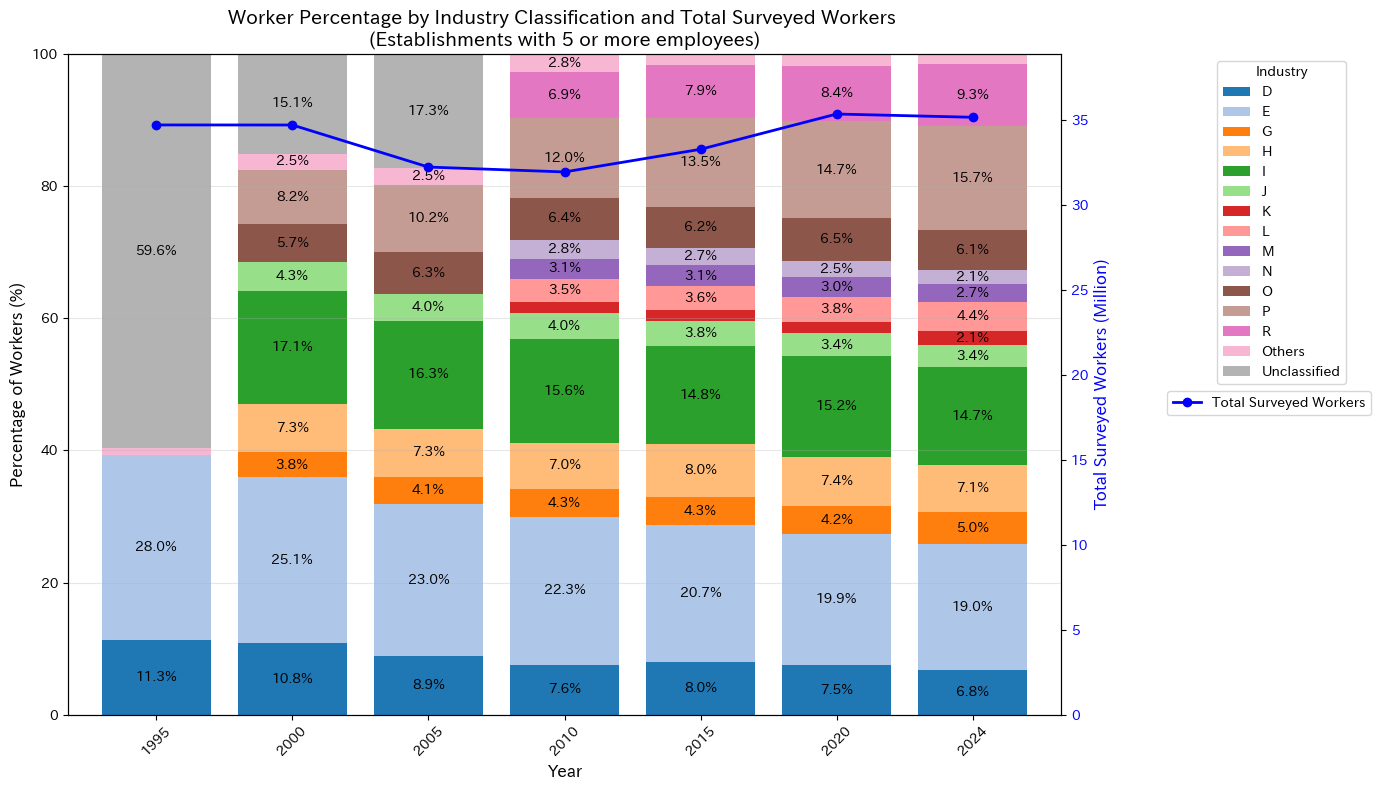

In [22]:
# ピボットテーブルを作成(年 × 産業分類_新)
pivot_data = employees_data_grouped.pivot(index="年", columns="産業分類_新", values="労働者数割合").fillna(0)

# 5年刻み（西暦が5で割り切れる年）と2024年のデータを抽出
target_years = sorted(list(set([y for y in pivot_data.index if y % 5 == 0] + [2024])))
# データに存在する年のみを対象にする
target_years = [y for y in target_years if y in pivot_data.index]
pivot_data = pivot_data.loc[target_years]

# 100%に満たない部分を「未分類」として追加
pivot_data["Unclassified"] = 100 - pivot_data.sum(axis=1)

# 列名を英語に変換
column_mapping = {
    "その他": "Others",
    "未分類": "Unclassified"
}
pivot_data = pivot_data.rename(columns=column_mapping)

# より多様な色を生成するため、複数のカラーマップを組み合わせる
n_colors = len(pivot_data.columns)

# 色のリストを作成（tab20、Set3、Pairedを組み合わせて多様性を確保）
colors = []
cmap1 = cm.get_cmap('tab20', 20)
cmap2 = cm.get_cmap('Set3', 12)
cmap3 = cm.get_cmap('Paired', 12)

for i in range(n_colors):
    if i < 20:
        colors.append(cmap1(i))
    elif i < 32:
        colors.append(cmap2(i - 20))
    else:
        colors.append(cmap3(i - 32))

# 未分類は灰色に設定
if "Unclassified" in pivot_data.columns:
    colors[-1] = (0.7, 0.7, 0.7, 1.0)  # グレー

# 2軸グラフを作成
fig, ax1 = plt.subplots(figsize=(14, 8))

# 帯グラフをプロット(棒グラフとして)
pivot_data.plot(kind='bar', stacked=True, ax=ax1, width=0.8, color=colors, legend=False)

# 各バーに労働者数割合の値を表示
for i, year in enumerate(pivot_data.index):
    y_offset = 0
    for col in pivot_data.columns:
        value = pivot_data.loc[year, col]
        if value > 2.0:  # type: ignore # 2%以上の場合のみ表示
            ax1.text(i, y_offset + value / 2, f'{value:.1f}%',  # type: ignore
                    ha='center', va='center', fontsize=10, color='black', fontweight='bold')
        y_offset += value # type: ignore

ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Percentage of Workers (%)", fontsize=12)
ax1.set_ylim(0, 100)
ax1.tick_params(axis='y')
plt.xticks(rotation=45)
ax1.grid(axis='y', alpha=0.3)

# 第2軸を作成(調査対象労働者数の折れ線グラフ用)
ax2 = ax1.twinx()

# t_employees_dataから調査対象労働者数を取得
t_employees_sorted = t_employees_data.sort_values("年")
# pivot_dataと同じ年にフィルタリング
t_employees_sorted = t_employees_sorted[t_employees_sorted["年"].isin(pivot_data.index)]

# 折れ線グラフをプロット(x座標はバーの位置に合わせる)
x_positions = range(len(pivot_data.index))
ax2.plot(x_positions, t_employees_sorted["労働者数"].values / 1000000,  # type: ignore
        color='blue', marker='o', linewidth=2, markersize=6, label='Total Surveyed Workers')

ax2.set_ylabel("Total Surveyed Workers (Million)", fontsize=12, color='blue')
ax2.set_ylim(0, t_employees_sorted["労働者数"].max() / 1000000 * 1.1)
ax2.tick_params(axis='y', labelcolor='blue')

# タイトルと凡例
plt.title("Worker Percentage by Industry Classification and Total Surveyed Workers \n(Establishments with 5 or more employees)", fontsize=14)

# 凡例を作成(帯グラフ用と折れ線グラフ用を統合)
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# 帯グラフの凡例を左側に配置
ax1.legend(handles1, labels1, title="Industry", bbox_to_anchor=(1.15, 1), loc='upper left')
# 折れ線グラフの凡例を右上に配置
ax2.legend(handles2, labels2, bbox_to_anchor=(1.1, 0.5) , loc='upper left')

plt.tight_layout()
plt.show()

- なんかおかしい
    - 2000年を境に、
        - E（製造業）の割合が急に減る
        - D（建設業）の割合も急に減る
        - I（卸売業、小売業）の割合が急に増える
        - O（教育、学習支援業）、G（情報通信業）、K（不動産業、物品賃貸業）P（医療、福祉）が出現
        - R（サービス業）もなんかおかしい
    - 2010年から、
        - N（生活関連サービス業、娯楽業）が出現
    - 2000年と2010年で、各産業の割合が急に変化しているので、分類カテゴリが変更・追加されている可能性あり
        - 2010年はリーマンショックかも

- 改定されてる！
    - [改定状況](https://www.e-stat.go.jp/classifications/terms/revisions/10?op=&search_word=&search_method=keyword&info1SearchFlg=1&info2SearchFlg=1&komokuSearchFlg=1&base_code=T&revision=04&search_kind=10&form_id=main_form&page=&isf1=1&isf2=1&isf3=0&ksf=1&sk=10&sm=keyword&sw=&sbs1=1&sbs2=0&sbs3=0)


In [405]:
# 1995年時点の産業分類カテゴリを取得
employees_1995 = employees_data_grouped[employees_data_grouped["年"] == 1995][["産業分類_新", "労働者数", "労働者数割合"]]
employees_1995["産業分類_新"].unique()

array(['D', 'E', 'その他'], dtype=object)

In [406]:
# 調査産業計（TL）の労働者数と、その他全産業の労働者数が一致するか確認
t_1995 = t_employees_data[t_employees_data["年"] == 1995]["労働者数"].values[0]
others_1995 = employees_1995["労働者数"].sum()

print(f"1995年の調査産業計（TL）の労働者数: {t_1995}")
print(f"1995年のその他全産業の労働者数の合計: {others_1995}")
print(f"差異: {t_1995 - others_1995}")

1995年の調査産業計（TL）の労働者数: 34684417.0
1995年のその他全産業の労働者数の合計: 14002996.0
差異: 20681421.0


In [407]:
# 2024年の調査産業計（TL）の労働者数と、その他全産業の労働者数が一致するか確認
t_2024 = t_employees_data[t_employees_data["年"] == 2024]["労働者数"].values[0]
others_2024 = employees_data_grouped[employees_data_grouped["年"] == 2024]["労働者数"].sum()
print(f"\n2024年の調査産業計（TL）の労働者数: {t_2024}")
print(f"2024年のその他全産業の労働者数の合計: {others_2024}")
print(f"差異: {t_2024 - others_2024}")


2024年の調査産業計（TL）の労働者数: 35135425.0
2024年のその他全産業の労働者数の合計: 35135427.0
差異: -2.0


- もしかして、事業所規模は企業の回答に依存している？
- なんで差異があるのかわかんねぇ

- 2024年の差異は、ほぼ誤差
- したがって、差異は「調査したけど、当時分類がなかったカテゴリ」として扱うのが妥当と判断する。